In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
graduation_data = Path("../resources/graduation_data.csv")
state_data = Path("../resources/state_data.csv")

In [3]:
graduation_data_df = pd.read_csv(graduation_data)
state_data_df = pd.read_csv(state_data)
graduation_data_df.head()


,State,2012-13
0,Alabama ..................,44233.0
1,Alaska ...................,7860.0
2,Arizona ..................,62208.0
3,Arkansas .................,28928.0
4,California ...............,422125.0


In [4]:
graduation_data_copy = graduation_data_df.copy()

In [5]:
graduation_data_copy["State"] = graduation_data_copy['State'].str.replace(r'\.+$', '', regex=True)
graduation_data_copy.head()


,State,2012-13
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [6]:
graduation_data_copy["State"]=graduation_data_copy["State"].apply(lambda x: x.strip())
graduation_data_copy.head()

,State,2012-13
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [7]:
graduation_data_copy = graduation_data_copy.rename(columns = {"State":"State", "2012-13":"Graduates"})
graduation_data_copy.head()

,State,Graduates
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [8]:
state_data_copy=state_data_df.copy()
state_data_copy=state_data_copy.rename(columns={"State Name [State] 2012-13":"State"})
state_data_copy.head()

,State Name,State,Instruction Expenditures (STE1) [State Finance] 2012-13,State Revenues (R3) per Pupil (MEMBR) [State Finance] 2012-13,Federal Revenues (STR4) per Pupil (MEMBR) [State Finance] 2012-13,Pupil/Teacher Ratio [State] 2012-13,Local Rev. - Property Tax (R1A) [State Finance] 2012-13,Grade 12 Students [Public School] 2012-13
0,CALIFORNIA,California,3.481554e+10,5696.00,1173.0,23.66,18324047150.00,494197.00
1,UTAH,Utah,2.494567e+09,4122.00,733.0,23.05,1466486401.00,40773.00
2,ARIZONA,Arizona,4.445724e+09,3640.00,1174.0,22.29,3013963966.00,81540.00
3,OREGON,Oregon,3.126634e+09,5177.00,970.0,22.25,2052018055.00,43637.00
4,NEVADA,Nevada,2.056074e+09,3135.00,902.0,21.54,1080252772.00,31939.00


In [9]:
merged=pd.merge(graduation_data_copy,state_data_copy,how="inner",on="State")
merged=merged.rename(columns={
    "State Revenues (R3) per Pupil (MEMBR) [State Finance] 2012-13":"State Revenue Per Pupil",
    "Federal Revenues (STR4) per Pupil (MEMBR) [State Finance] 2012-13":"Federal Revenue Per Pupil",
    "Pupil/Teacher Ratio [State] 2012-13":"Pupil to Teacher Ratio",
    "Grade 12 Students [Public School] 2012-13":"Grade 12 Students"
})
merged=merged.drop(["Instruction Expenditures (STE1) [State Finance] 2012-13","Local Rev. - Property Tax (R1A) [State Finance] 2012-13","State Name"],axis="columns")
merged

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students
0,Alabama,44233.0,5286.00,1142.0,14.35,‡
1,Alaska,7860.0,13918.00,2464.0,17.12,9681.00
2,Arizona,62208.0,3640.00,1174.0,22.29,81540.00
3,Arkansas,28928.0,5398.00,1259.0,14.24,30734.00
4,California,422125.0,5696.00,1173.0,23.66,494197.00
5,Colorado,50968.0,4360.00,814.0,17.65,62491.00
6,Connecticut,38722.0,7558.00,838.0,12.54,40743.00
7,Delaware,8070.0,8708.00,1491.0,13.94,8330.00
8,Florida,158029.0,3512.00,1147.0,15.25,183193.00
9,Georgia,92416.0,4474.00,1094.0,15.57,101078.00


In [10]:
merged["Grade 12 Students"]=merged["Grade 12 Students"].str.replace(r'[^0-9.]', '', regex=True).str.strip()
merged["Grade 12 Students"]=pd.to_numeric(merged["Grade 12 Students"],errors="coerce")

In [11]:
merged["State Revenue Per Pupil"]=pd.to_numeric(merged["State Revenue Per Pupil"],errors="coerce")

In [12]:
print(merged.dtypes)

merged.head()


State                         object
Graduates                    float64
State Revenue Per Pupil      float64
Federal Revenue Per Pupil    float64
Pupil to Teacher Ratio       float64
Grade 12 Students            float64
dtype: object


,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0
4,California,422125.0,5696.0,1173.0,23.66,494197.0


In [13]:
merged["Graduation Rates"]=merged["Graduates"]/merged["Grade 12 Students"]
merged["Combined Federal and State Revenue Per Pupil"]=merged["State Revenue Per Pupil"]+merged["Federal Revenue Per Pupil"]
merged



,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN,NaN,6428.0
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0
6,Connecticut,38722.0,7558.0,838.0,12.54,40743.0,0.950396,8396.0
7,Delaware,8070.0,8708.0,1491.0,13.94,8330.0,0.968788,10199.0
8,Florida,158029.0,3512.0,1147.0,15.25,183193.0,0.862637,4659.0
9,Georgia,92416.0,4474.0,1094.0,15.57,101078.0,0.914304,5568.0


In [14]:
# Identify rows with graduation rates > 1
anomalous_rows = merged[merged["Graduation Rates"] > 1]
print("Anomalous Rows:")
print(anomalous_rows)

# Correct graduation rates > 1
merged.loc[merged["Graduation Rates"] > 1, "Graduation Rates"] /= 100

Anomalous Rows:
      State  Graduates  State Revenue Per Pupil  Federal Revenue Per Pupil  \
10   Hawaii    10790.0                  10625.0                     1682.0   
34     Ohio   122491.0                   5683.0                     1124.0   
44  Vermont     6491.0                  16284.0                     1304.0   

    Pupil to Teacher Ratio  Grade 12 Students  Graduation Rates  \
10                   15.92            10721.0          1.006436   
34                   16.32           117586.0          1.041714   
44                   10.67             6066.0          1.070063   

    Combined Federal and State Revenue Per Pupil  
10                                       12307.0  
34                                        6807.0  
44                                       17588.0  


In [15]:
merged = merged.dropna(subset=["Graduation Rates"])
merged.head()
merged = merged.loc[merged['Graduation Rates'] <1]
merged.head()
merged = merged.loc[merged['Graduation Rates'] >.6]
merged.head()


,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0


In [16]:
#1. What is the relationship between school funding and education outcome (highschool graduation)?
#Make the assumption that state taxes are correlated with public school spending 
#State and federal on 1
#federal on another 
#histogram of state funding 
#2. Do higher pupil/teacher ratios reduce graduation rates?
#ratio between pupil/teacher 
#3. How do the census regions compare to each other in graduation rates?

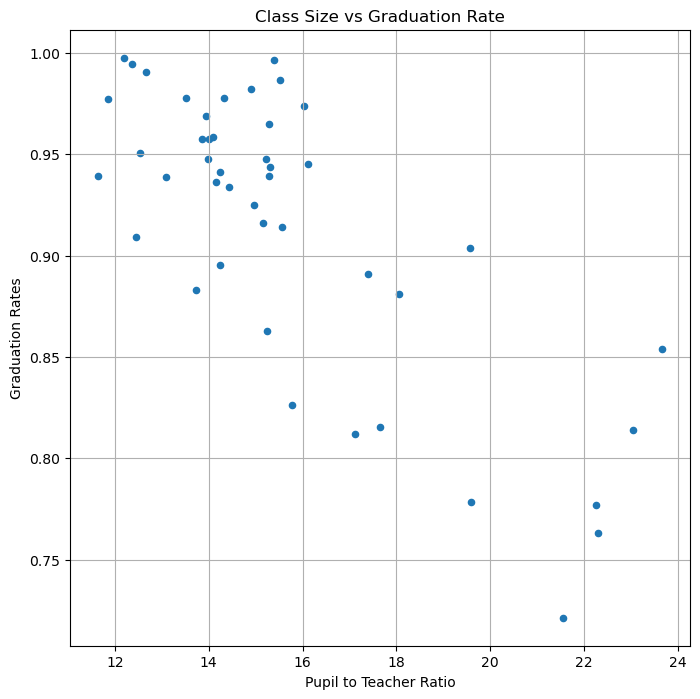

In [17]:
# Create a scatter plot which compares MPG to horsepower
merged.plot(kind="scatter", x="Pupil to Teacher Ratio", y="Graduation Rates", grid=True, figsize=(8,8),
              title="Class Size vs Graduation Rate")

plt.show()

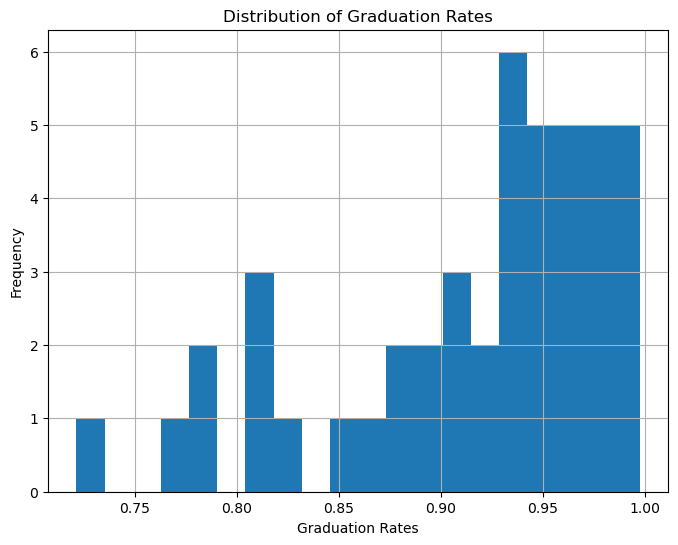

In [18]:
merged["Graduation Rates"].hist(bins=20, figsize=(8, 6))
plt.title("Distribution of Graduation Rates")
plt.xlabel("Graduation Rates")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

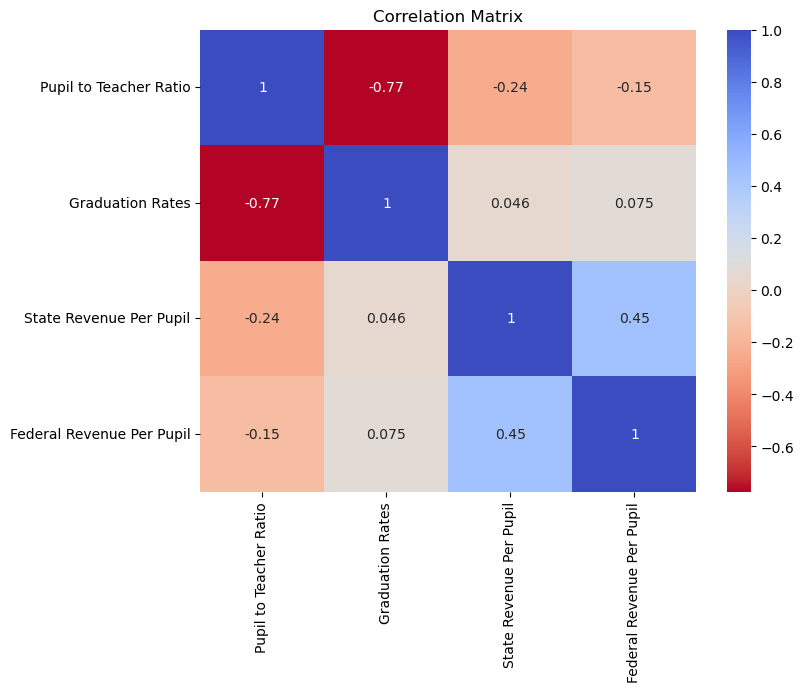

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = merged[["Pupil to Teacher Ratio", "Graduation Rates", "State Revenue Per Pupil", "Federal Revenue Per Pupil"]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm_r")
plt.title("Correlation Matrix")
plt.show()

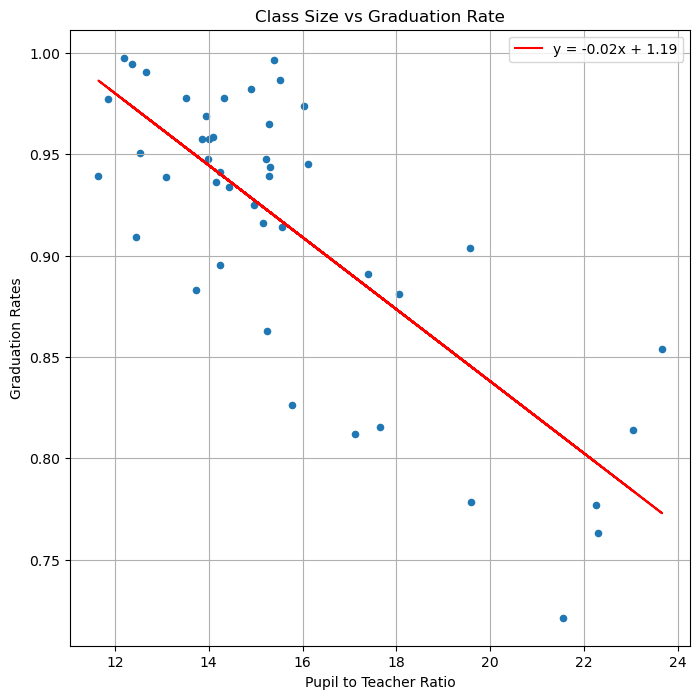

Correlation Coefficient (r): -0.77


In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot
merged.plot(kind="scatter", x="Pupil to Teacher Ratio", y="Graduation Rates", grid=True, figsize=(8, 8),
            title="Class Size vs Graduation Rate")

# Get x and y data
x = merged["Pupil to Teacher Ratio"]
y = merged["Graduation Rates"]

# Fit the line of best fit
m, b = np.polyfit(x, y, 1)  # Linear fit (1 = degree of polynomial)

# Plot the line of best fit
plt.plot(x, m * x + b, color="red", label=f"y = {m:.2f}x + {b:.2f}")

# Add legend
plt.legend()

# Show plot
plt.show()

# Print R-value
correlation = x.corr(y)
print(f"Correlation Coefficient (r): {correlation:.2f}")

